In [50]:
import numpy as np
import pandas as pd
import sys
from sklearn.preprocessing import StandardScaler
np.random.seed(10)

In [51]:
filepath="data/pima-indians-diabetes.xls"
all_df=pd.read_excel(filepath)

In [52]:
cols=['Outcome','Pregnancies','Glucose','Blood','Skin','Insulin',
      'BMI','Diabetes', 'Age']
all_df=all_df[cols]

In [53]:
all_df[:5]

,Outcome,Pregnancies,Glucose,Blood,Skin,Insulin,BMI,Diabetes,Age
0,1,6,148,72,35,0,33.6,0.627,50
1,0,1,85,66,29,0,26.6,0.351,31
2,1,8,183,64,0,0,23.3,0.672,32
3,0,1,89,66,23,94,28.1,0.167,21
4,1,0,137,40,35,168,43.1,2.288,33


In [54]:
zero_not_accepted = ['Glucose', 'Blood', 'Skin', 'BMI', 'Insulin']       
for column in zero_not_accepted: 
    mean = int(all_df[column].mean(skipna=True))
    all_df[column].replace(0, mean,inplace=True)

In [55]:
msk = np.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))   

total: 768 train: 616 test: 152


In [56]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

train_Features=StandardScaler().fit_transform(train_Features)
test_Features=StandardScaler().fit_transform(test_Features)

In [57]:
train_Features[:2]

array([[ 0.68004207,  0.88222526, -0.02133549,  0.86471493, -0.41811974,
         0.17467821,  0.45102803,  1.46416999],
       [-0.82248991, -1.18724996, -0.5141854 ,  0.24389395, -0.41811974,
        -0.83134882, -0.36630283, -0.17444596]])

In [58]:
train_Label[:2]

array([1., 0.])

In [59]:
test_Features[:2]

array([[ 1.63837785,  1.4616998 ,  0.1510988 , -0.56924141, -0.43622157,
         0.82197801,  0.25283098, -0.01013739],
       [ 0.20550424,  1.39550634, -0.01777633, -0.66985152,  0.64246766,
        -1.0515176 ,  0.41798057,  1.36854704]])

In [60]:
test_Label[:2]

array([1., 1.])

In [61]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [62]:
model = Sequential()

In [63]:
model.add(Dense(units=30, input_dim=8, 
                kernel_initializer='uniform', 
                activation='relu'))

In [64]:
model.add(Dense(units=20, 
                kernel_initializer='uniform', 
                activation='relu'))

In [65]:
model.add(Dense(units=20, 
                kernel_initializer='uniform', 
                activation='relu'))

In [66]:
model.add(Dense(units=20, 
                kernel_initializer='uniform', 
                activation='relu'))

In [67]:
model.add(Dense(units=20, 
                kernel_initializer='uniform', 
                activation='relu'))

In [68]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_14 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_15 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_16 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_17 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 21        
Total params: 2,171
Trainable params: 2,171
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam' , metrics=['accuracy','binary_crossentropy'])

In [70]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 554 samples, validate on 62 samples
Epoch 1/30
 - 1s - loss: 0.6914 - acc: 0.6534 - binary_crossentropy: 0.6914 - val_loss: 0.6912 - val_acc: 0.5806 - val_binary_crossentropy: 0.6912
Epoch 2/30
 - 0s - loss: 0.6871 - acc: 0.6534 - binary_crossentropy: 0.6871 - val_loss: 0.6882 - val_acc: 0.5806 - val_binary_crossentropy: 0.6882
Epoch 3/30
 - 0s - loss: 0.6776 - acc: 0.6534 - binary_crossentropy: 0.6776 - val_loss: 0.6794 - val_acc: 0.5806 - val_binary_crossentropy: 0.6794
Epoch 4/30
 - 0s - loss: 0.6414 - acc: 0.6534 - binary_crossentropy: 0.6414 - val_loss: 0.6364 - val_acc: 0.5806 - val_binary_crossentropy: 0.6364
Epoch 5/30
 - 0s - loss: 0.5529 - acc: 0.6534 - binary_crossentropy: 0.5529 - val_loss: 0.6116 - val_acc: 0.5806 - val_binary_crossentropy: 0.6116
Epoch 6/30
 - 0s - loss: 0.5196 - acc: 0.6534 - binary_crossentropy: 0.5196 - val_loss: 0.5912 - val_acc: 0.5806 - val_binary_crossentropy: 0.5912
Epoch 7/30
 - 0s - loss: 0.5099 - acc: 0.6534 - binary_crossentropy: 0.50

In [71]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

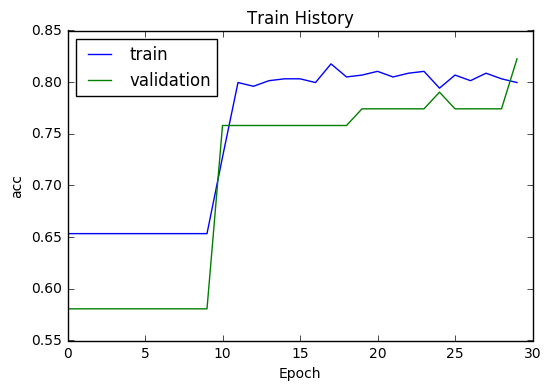

In [72]:
show_train_history(train_history,'acc','val_acc')

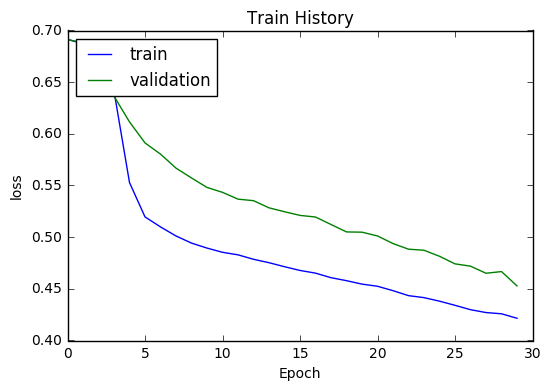

In [73]:
show_train_history(train_history,'loss','val_loss')

In [74]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

152/152 [==============================] - 0s 116us/step


In [75]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 73.68%


In [76]:
scores[1]

0.7368421052631579

In [85]:
predictions = model.predict(test_Features)
print(np.round(predictions))

[[1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [80]:
rounded = [np.round(test_Features) for test_Features in predictions]
print(rounded )

[array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=f